### Group 5

> My Pham

> Mahesh.M.Iyer

> Sujith Nair

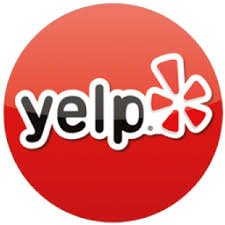

### Project Description

In a bid to stay ahead, companies use data analytics to gauge their standing against competitors and gain leverage over them. Yelp is a business directory service and crowd-sourced review forum and collects data such as user ratings on a particular business, along with their locations, reviews (text), ratings, timings, likes, dislikes, etc.
A business has many choices when it comes to investing money. Should a restaurant get well-known chefs or excellent lighting? Should a salon invest in high tech appliances or comfortable seats? If many customers talk about “ambience” while giving a 5-star review, it would mean customers really care about great ambience and hence the business should focus on it. Our aim is to explore this mass of data and answer the following and come up with interesting questions and analyze how or what a business can use to plan their next step to position their product/brand.

## Importing packages & datasets

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os
import re
import string
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [151]:
yb = pd.read_csv('yelp_business.csv')
ybh = pd.read_csv('yelp_business_hours.csv')
yr = pd.read_csv('yelp_review.csv')
yu = pd.read_csv('yelp_user.csv')
yc = pd.read_csv('yelp_checkin.csv')
yba = pd.read_csv('yelp_business_attributes.csv')
yt = pd.read_csv('yelp_tip.csv')

## Reviewing the different datasets

#### Business tables

In [152]:
yb.shape

(174567, 13)

In [153]:
yb.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...


In [154]:
ybh.shape

(174567, 8)

In [155]:
ybh.head(3)

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None


In [156]:
yba.shape

(152041, 82)

In [157]:
yba.head(3)

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [158]:
yc.shape

(3911218, 4)

In [159]:
yc.head(3)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1


#### User & Reviews table

In [160]:
yr.shape

(5261668, 9)

In [161]:
yr.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [162]:
yt.shape

(1098324, 5)

In [163]:
yt.head(3)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ


In [164]:
yu.shape

(1326100, 22)

In [165]:
yu.head(3)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


## Exploratory data analysis

The business data includes mostly states in the USA and a few from Canada. For the purpose of this project, we focus only on businesses in the USA

In [166]:
ybus = yb.loc[yb['state'].isin(['AL','AK','AR','AZ','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])]

In [167]:
ybus.state.describe()

count     128302
unique        25
top           AZ
freq       52214
Name: state, dtype: object

In [168]:
statemap = pd.DataFrame(ybus[['state', 'business_id']].groupby(['state'])\
['business_id'].agg('count').sort_values(ascending=False))
statemap['state'] = statemap.index

data = dict(type='choropleth',
            locations = statemap['state'],
            z = statemap['business_id'],
            locationmode = 'USA-states',
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"No.of businesses"})

layout = dict(title = 'Number of businesses in each state (USA)',
              geo = dict(scope='usa',
                         showlakes = False,
                         lakecolor = 'rgb(85,173,240)'))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Below, is a count plot of the 'is_open' column in the business dataset. We can use this feature as a classification problem to examine the features responsible for the closure of a business.

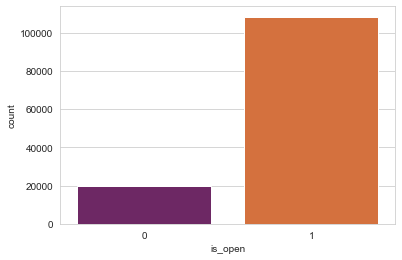

In [169]:
sns.countplot(x='is_open',data=ybus,palette='inferno')

Text(0.5, 1.0, 'Count plot of star ratings for businesses')

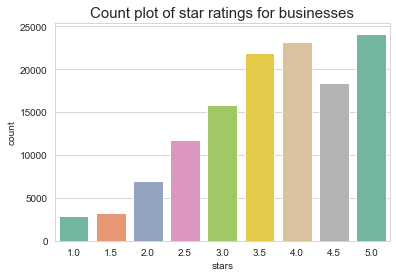

In [170]:
sns.countplot(x='stars',data=ybus,palette='Set2');
plt.title('Count plot of star ratings for businesses',fontsize=15)

Below, we can see that the distribution of the 'review_count' feature is extremely skewed so it might affect our classification models. So we applied a log transformation to it

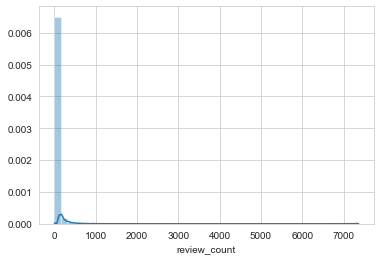

In [171]:
sns.distplot(ybus['review_count'])

In [172]:
ybus['review_count'] = ybus['review_count'].apply(np.log1p)

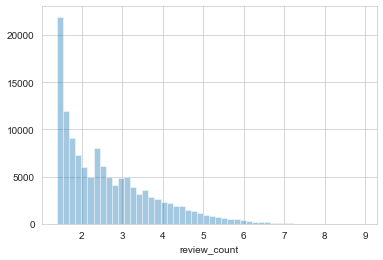

In [173]:
sns.distplot(ybus['review_count'],kde=False)

We make a plot showing the top or most frequently occuring categories of businesses in the yelp dataset. It looks like restaurants are the most common category which makes sense

Text(0.5, 1.0, 'Most frequently occuring categories')

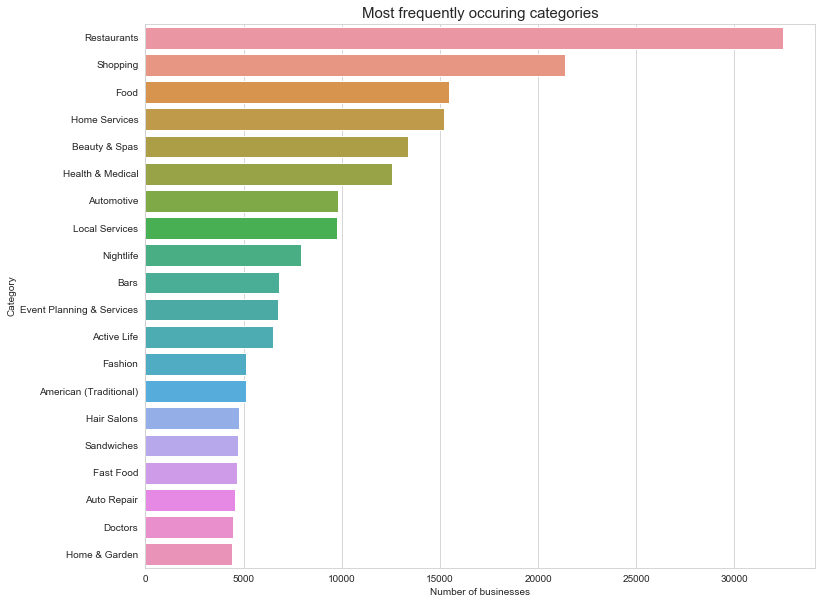

In [174]:
business_cats=';'.join(ybus['categories'])
cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
cats_ser = cats.category.value_counts()
cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)
plt.figure(figsize=(12,10))
f = sns.barplot( y= 'index',x = 'category' , data = cats_df.iloc[0:20])
f.set_ylabel('Category')
f.set_xlabel('Number of businesses');
f.set_title('Most frequently occuring categories',fontsize=15)

In [175]:
rest = ybus[ybus['categories'].str.contains("Restaurants")]

In [176]:
rest.shape

(32472, 13)

## Data preprocessing - Feature Engineering

So for our classification problem we decided to use the Business dataset and also pick columns from the attributes and check-ins data

In [177]:
ybus.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,3.135494,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,2.484907,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,2.944439,1,Departments of Motor Vehicles;Public Services ...


In [178]:
rest.drop(columns=['neighborhood','name','state','postal_code','address','city','latitude','longitude','categories'],inplace=True)

In [179]:
rest.is_open.value_counts()

1    23382
0     9090
Name: is_open, dtype: int64

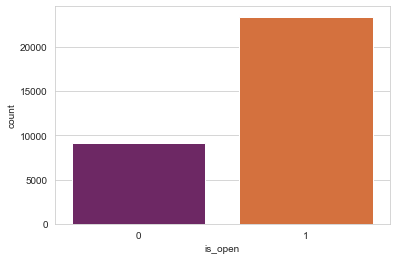

In [180]:
sns.countplot(x='is_open',data=rest,palette='inferno')

In [181]:
yc_group = pd.DataFrame(yc[['business_id', 'checkins']].groupby(['business_id'])\
['checkins'].agg('mean').sort_values(ascending=False))

In [182]:
yc_group = yc_group.reset_index()
yc_group.head(3)

,business_id,checkins
0,FaHADZARwnY4yvlvpnsfGA,785.464286
1,JmI9nslLD7KZqRr__Bg6NQ,670.178571
2,yQab5dxZzgBLTEHCw9V7_w,297.226190


In [183]:
rest = pd.merge(rest,yc_group, how='left',on='business_id')

In [184]:
rest.head()

,business_id,stars,review_count,is_open,checkins
0,PfOCPjBrlQAnz__NXj9h_w,3.5,4.762174,1,3.287500
1,XOSRcvtaKc_Q5H1SAzN20A,4.5,1.386294,0,1.333333
2,fNMVV_ZX7CJSDWQGdOM8Nw,3.5,2.079442,1,1.400000
3,Dj0S-Oe4ytRJzMGUPgYUkw,2.0,1.609438,1,1.000000
4,gAy4LYpsScrj8POnCW6btQ,3.5,1.945910,0,1.000000


In [185]:
rest.dropna(axis='rows',inplace=True)

The business attributes seems to have a lot of features that we think might be really important for the classiffication modeling. For e.g. the Business Parking_Garage might be important as we do like it when parking is convenient when we go to a restaurant or salon.

In [186]:
yba.head(3)

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [187]:
yclean = pd.DataFrame(yba.describe())

In [188]:
yclean.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
count,152041,152041,152041,152041,152041,152041,152041,152041,152041,152041,...,152041,152041,152041,152041,152041,152041,152041,152041,152041,152041
unique,152041,1,3,3,3,3,3,3,3,3,...,1,1,3,3,3,3,3,3,3,4
top,e89vBN7A6xXvGiJr8BrWvQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
freq,1,152041,151946,128460,131649,112687,112687,113734,112687,112687,...,152041,152041,151931,151931,151931,151931,151931,151931,151931,152038


In [189]:
yclean = yclean.T

We drop the columns which have only 1 unique values as they wont help the model

In [190]:
yclean[yclean.unique == 1]

,count,unique,top,freq
AcceptsInsurance,152041,1,Na,152041
Corkage,152041,1,Na,152041
DietaryRestrictions_dairy-free,152041,1,Na,152041


In [191]:
yba.drop(columns=['CoatCheck', 'DietaryRestrictions_gluten-free',
       'DietaryRestrictions_vegan', 'DietaryRestrictions_kosher',
       'DietaryRestrictions_halal', 'DietaryRestrictions_soy-free',
       'DietaryRestrictions_vegetarian', 'AgesAllowed',
       'RestaurantsCounterService','HasTV'],inplace=True)

In [192]:
yba_temp = yba

In [193]:
yba_temp.replace({'Na': 1,'False':0,'True':2}, inplace=True)

The object type remaining columns have more than 2-3 categories so we one hot encode it

In [194]:
ybatemp=pd.DataFrame(yba_temp)

In [195]:
ybatemp.BusinessAcceptsCreditCards.value_counts()

1    128460
0     12450
2     11131
Name: BusinessAcceptsCreditCards, dtype: int64

In [196]:
ybatemp.dropna(axis='rows',inplace=True)

In [197]:
rest = pd.merge(rest,ybatemp, how='left',on='business_id')

In [198]:
rest.dropna(axis='rows',inplace=True)

In [199]:
rest = pd.get_dummies(rest, columns=['BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'NoiseLevel', 'RestaurantsAttire', 'Music_dj',
       'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'GoodForDancing', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'Smoking', 'DriveThru', 'DogsAllowed', 'Open24Hours', 'BYOBCorkage',
       'BYOB'],drop_first=True)

In [200]:
rest.dropna(axis='rows',inplace=True)

In [239]:
model=rest.drop(columns='business_id')

In [240]:
rest.columns

Index(['business_id', 'stars', 'review_count', 'is_open', 'checkins',
       'AcceptsInsurance', 'ByAppointmentOnly', 'HairSpecializesIn_coloring',
       'HairSpecializesIn_africanamerican', 'HairSpecializesIn_curly',
       ...
       'Smoking_2.0', 'DriveThru_no', 'DriveThru_outdoor', 'DriveThru_yes',
       'DogsAllowed_1.0', 'DogsAllowed_2.0', 'Open24Hours_1.0', 'BYOB_no',
       'BYOB_yes_corkage', 'BYOB_yes_free'],
      dtype='object', length=120)

In [241]:
model.shape

(31045, 119)

In [204]:
X = model.drop(columns=['is_open'])
y = model['is_open']

In [205]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)

## Scaling the data

In [206]:
model.describe()

,stars,review_count,is_open,checkins,AcceptsInsurance,ByAppointmentOnly,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,...,Smoking_2.0,DriveThru_no,DriveThru_outdoor,DriveThru_yes,DogsAllowed_1.0,DogsAllowed_2.0,Open24Hours_1.0,BYOB_no,BYOB_yes_corkage,BYOB_yes_free
count,31045.000000,31045.000000,31045.000000,31045.000000,31045.0,31045.0,31045.000000,31045.0,31045.0,31045.0,...,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000,31045.000000
mean,3.427976,3.488840,0.733935,3.327781,1.0,1.0,0.375616,1.0,1.0,1.0,...,0.000290,0.008246,0.007441,0.002996,0.852343,0.068417,0.999839,0.001127,0.000161,0.000354
std,0.797243,1.322405,0.441906,5.778324,0.0,0.0,0.521319,0.0,0.0,0.0,...,0.017024,0.090434,0.085940,0.054651,0.354765,0.252464,0.012690,0.033558,0.012690,0.018820
min,1.000000,1.386294,0.000000,1.000000,1.0,1.0,0.000000,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.397895,0.000000,1.176471,1.0,1.0,0.000000,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.500000,3.401197,1.000000,1.595745,1.0,1.0,0.000000,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,4.430817,1.000000,3.054545,1.0,1.0,1.000000,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,8.904087,1.000000,226.524476,1.0,1.0,2.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We decided to use standard scaler as the pairplot above shows that the datapoints are extremely scattered about the mean, and the standard deviations in some columns are very high i.e. far from the mean.

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_sc)
X_test = scaler.transform(X_test_sc)

## Classification Models

### 1. Logistic Regression

As we saw before, our classes are highly imbalanced. So, we first run the imbalanced data into the logistic regressor

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression(penalty='l2',random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2',random_state=0),param_grid,cv=3)
grid_log_reg.fit(X_train, y_train)
scores = cross_val_score(logreg,X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train, y_train))
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test, y_test))
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
cv_logit = "Average cross-validation score: {:.2f}".format(scores.mean())
param_logit = grid_log_reg.best_params_

Cross-validation scores: [0.76011042 0.75258871 0.76101063]
Average cross-validation score: 0.76
Logistic Regression Training Score:  0.7606184713082693
Logistic Regression Testing Score:  0.7544556581490229
Best Parameters for Logistic Regression:  {'C': 0.1}


Text(0.5, 0, 'C')

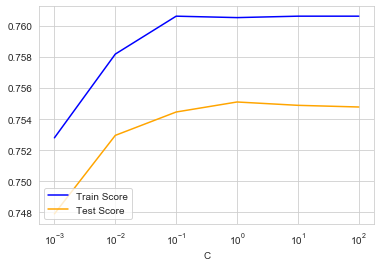

In [209]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in x_range: 
    model = LogisticRegression(C=alpha, random_state=0)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))
    
plt.plot(x_range, train_score_list, c = 'b', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'orange', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [210]:
logit = LogisticRegression(penalty = 'l2', C = 0.1, random_state=0)
logit.fit(X_train, y_train)
logit_predict = logit.predict(X_test)
print(classification_report(y_test,logit_predict))
lr = classification_report(y_test,logit_predict)

              precision    recall  f1-score   support

           0       0.62      0.20      0.30      2478
           1       0.77      0.96      0.85      6836

    accuracy                           0.75      9314
   macro avg       0.69      0.58      0.58      9314
weighted avg       0.73      0.75      0.71      9314



From the above model, we can see that though the model accuracy is 75%, the recall score for the minority class is very poor and this means the model is merely placing every prediction as part of the majority class.
So to fix the imbalance, we try using the SMOTE algorithm and the Near-miss algorithm

#### i) SMOTE algorithm

In [211]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression(penalty='l2',random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2',random_state=0),param_grid,cv=3)
grid_log_reg.fit(X_train_res, y_train_res)
scores = cross_val_score(logreg,X_train_res,y_train_res)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train_res, y_train_res))
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test, y_test))
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
cv_logit = "Average cross-validation score: {:.2f}".format(scores.mean())
param_logit = grid_log_reg.best_params_

Cross-validation scores: [0.66353207 0.66770128 0.66704289]
Average cross-validation score: 0.67
Logistic Regression Training Score:  0.6672205153928146
Logistic Regression Testing Score:  0.6505260897573545
Best Parameters for Logistic Regression:  {'C': 1}


In [213]:
logit = LogisticRegression(penalty = 'l2', C = 1, random_state=0)
logit.fit(X_train_res, y_train_res)
coefs = np.abs(logit.coef_[0])
logit_predict = logit.predict(X_test)
print(classification_report(y_test,logit_predict))

              precision    recall  f1-score   support

           0       0.41      0.69      0.51      2478
           1       0.85      0.64      0.73      6836

    accuracy                           0.65      9314
   macro avg       0.63      0.66      0.62      9314
weighted avg       0.73      0.65      0.67      9314



In [214]:
coefs= logit.coef_[0]

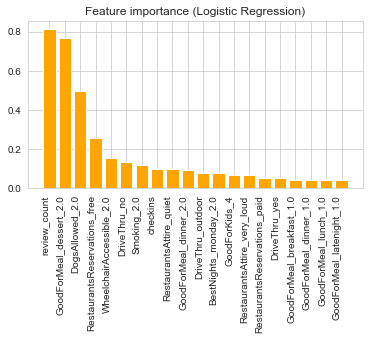

In [215]:
indices = np.argsort(coefs)[::-1]
coefs= logit.coef_[0]
plt.figure()
plt.title("Feature importance (Logistic Regression)")
plt.bar(range(20), coefs[indices[:20]],
       color="orange", align="center")
plt.xticks(range(20),X.columns[indices[0:20]], rotation=90, ha='right')
plt.subplots_adjust(bottom=0.3)

#### ii) Near-Miss algorithm

In [216]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression(penalty='l2',random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2',random_state=0),param_grid,cv=3)
grid_log_reg.fit(X_train_miss, y_train_miss)
scores = cross_val_score(logreg,X_train_miss, y_train_miss)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train_miss, y_train_miss))
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test, y_test))
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
cv_logit = "Average cross-validation score: {:.2f}".format(scores.mean())
param_logit = grid_log_reg.best_params_

Cross-validation scores: [0.63511411 0.69226777 0.59807992]
Average cross-validation score: 0.64
Logistic Regression Training Score:  0.6834140435835351
Logistic Regression Testing Score:  0.5474554434185098
Best Parameters for Logistic Regression:  {'C': 0.01}


In [218]:
logit = LogisticRegression(penalty = 'l2', C = 0.01, random_state=0)
logit.fit(X_train_miss, y_train_miss)
logit_predict = logit.predict(X_test)
print(classification_report(y_test,logit_predict))
lr = classification_report(y_test,logit_predict)

              precision    recall  f1-score   support

           0       0.31      0.57      0.40      2478
           1       0.78      0.54      0.64      6836

    accuracy                           0.55      9314
   macro avg       0.54      0.55      0.52      9314
weighted avg       0.65      0.55      0.57      9314



### The smote algorithm has a low accuracy of 65% but the recall scores of both classes are much better so we decided to use the SMOTE model. The feature importance plot shows which ones are most important in the closure of a business.

## 2. Decision tree Classifier with SMOTE

In [219]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}
grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train_res,y_train_res)
print(grid_tree.best_params_)
print(grid_tree.score(X_train_res,y_train_res))
print(grid_tree.score(X_test,y_test))

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.6136434886199762
0.4768091045737599


In [220]:
tree = DecisionTreeClassifier(random_state=0,max_depth= 3, max_leaf_nodes= 4, min_samples_split= 2)
tree.fit(X_train_res, y_train_res)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.614
Accuracy on test set: 0.477


In [221]:
dtree_predict = tree.predict(X_test)
print(classification_report(y_test,dtree_predict))
dectree = classification_report(y_test,dtree_predict)

              precision    recall  f1-score   support

           0       0.32      0.89      0.48      2478
           1       0.89      0.33      0.48      6836

    accuracy                           0.48      9314
   macro avg       0.61      0.61      0.48      9314
weighted avg       0.74      0.48      0.48      9314



## 3. Random Forest Classifier with SMOTE

In [222]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}
grid_for = GridSearchCV(forest,param_DT,cv=5)
grid_for.fit(X_train_res,y_train_res)
print(grid_for.best_params_)
print(grid_for.score(X_train_res,y_train_res))
print(grid_for.score(X_test,y_test))

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.6451188162267226
0.6045737599312863


In [227]:
forest = RandomForestClassifier(random_state=0,max_depth= 3, max_leaf_nodes= 4, min_samples_split= 2)
forest.fit(X_train_res, y_train_res)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.645
Accuracy on test set: 0.605


In [228]:
dfor_predict = forest.predict(X_test)
print(classification_report(y_test,dfor_predict))
dectree = classification_report(y_test,dfor_predict)

              precision    recall  f1-score   support

           0       0.38      0.74      0.50      2478
           1       0.86      0.56      0.67      6836

    accuracy                           0.60      9314
   macro avg       0.62      0.65      0.59      9314
weighted avg       0.73      0.60      0.63      9314



## 4. K-neighbors Classifier with SMOTE

In [225]:
knn = KNeighborsClassifier(4)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [226]:
Knn_predict = knn.predict(X_test)
print(classification_report(y_test,Knn_predict))
knb = classification_report(y_test,Knn_predict)

              precision    recall  f1-score   support

           0       0.37      0.64      0.47      2478
           1       0.82      0.59      0.69      6836

    accuracy                           0.61      9314
   macro avg       0.59      0.62      0.58      9314
weighted avg       0.70      0.61      0.63      9314



------------------------------
------------------------------
------------------------------

# Sentiment Analysis - WordClouds

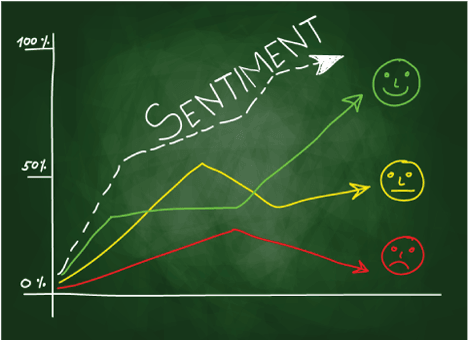

## For the second part, we want to explore how we can use Sentiment Analysis to help businesses

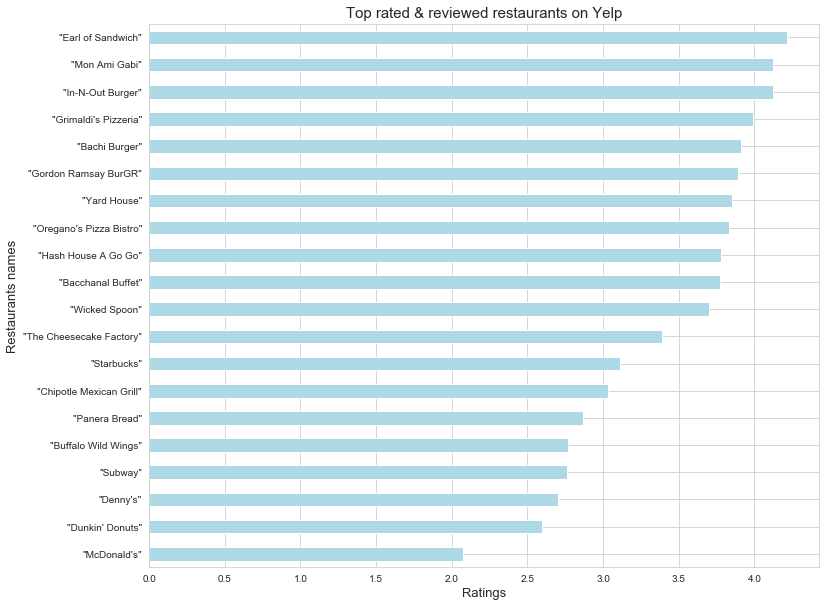

In [229]:
yr['name'] = yr['business_id'].map(yb.set_index('business_id')['name'])
top_restaurants = yr.name.value_counts().index[:20].tolist()
top = yr.loc[yr['name'].isin(top_restaurants)]

top.groupby(top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10),color='lightblue')
plt.yticks(fontsize=10)
plt.title('Top rated & reviewed restaurants on Yelp',fontsize=15)
plt.ylabel('Restaurants names', fontsize=13)
plt.xlabel('Ratings', fontsize=13)
plt.show()

In [230]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x) 
i = stopwords.words('english')
j = list(string.punctuation)
stopwords = set(i).union(j)

yt['name'] = yt['business_id'].map(yb.set_index('business_id')['name'])
tiptop = yt.loc[yt['name'].isin(top_restaurants)]
tiptop['text_clear'] = tiptop['text'].apply(preprocess)

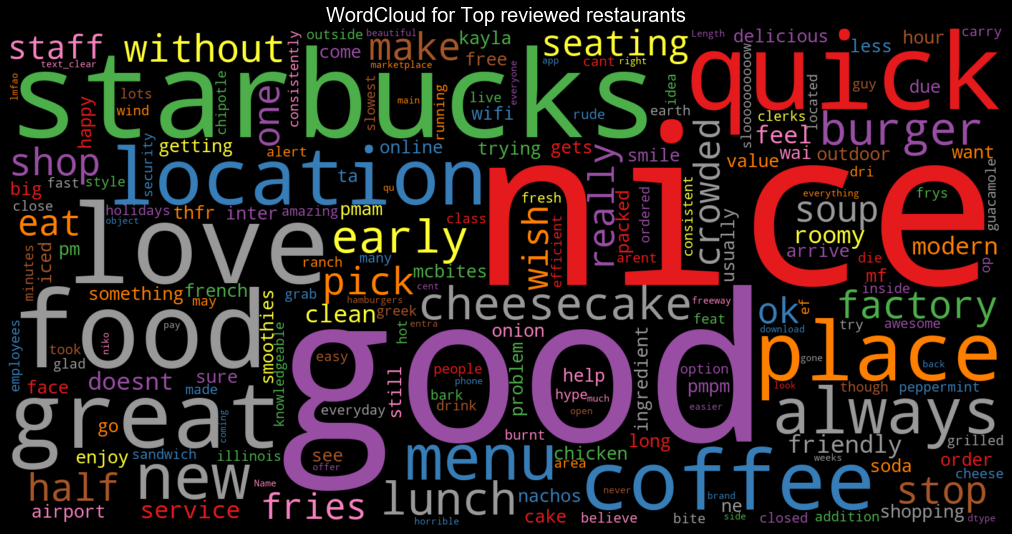

In [231]:
from wordcloud import WordCloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000,colormap='Set1')
wc.generate(str(tiptop['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("WordCloud for Top reviewed restaurants", fontsize=20,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### Earl of sandwich seems like the most reviewed restaurant so we make a wordCloud for the reviews to see the most frequently occuring words

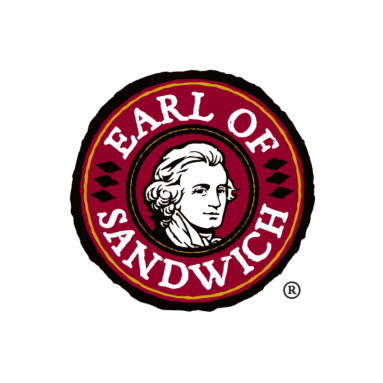

In [232]:
earl = yb.loc[yb['name'] == '"Earl of Sandwich"']
earl_r = yr.loc[yr['business_id'].isin(earl.business_id)]
earl_r['text_clear'] = earl_r['text'].apply(preprocess)

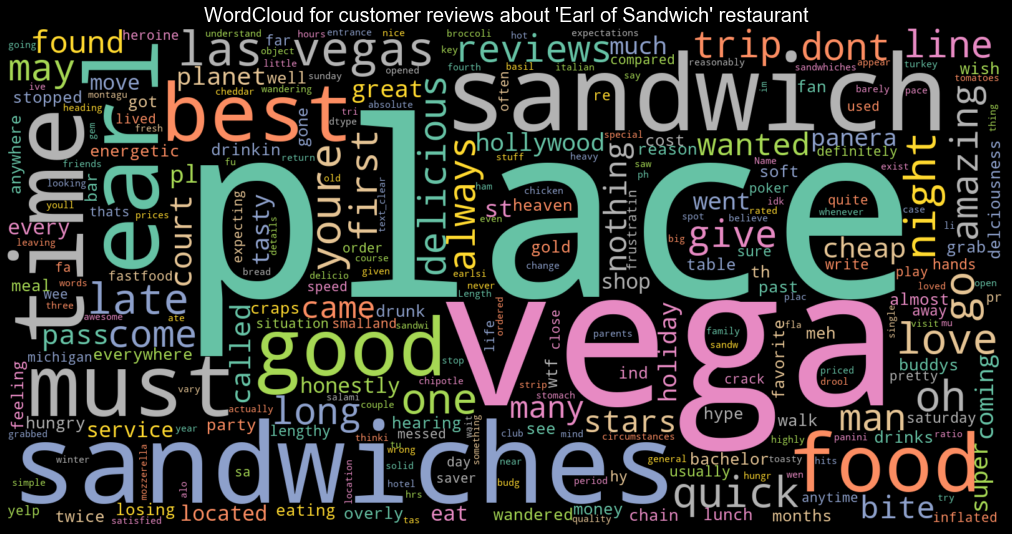

In [233]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000,colormap='Set2')
wc.generate(str(earl_r['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("WordCloud for customer reviews about 'Earl of Sandwich' restaurant", fontsize=20,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

> We can see that there are mostly good reviews, about the food being delicious, tasty, amazing and so on. A few reviews also talk about the food being late so that might be an area to improve, so as to maintain their high standards

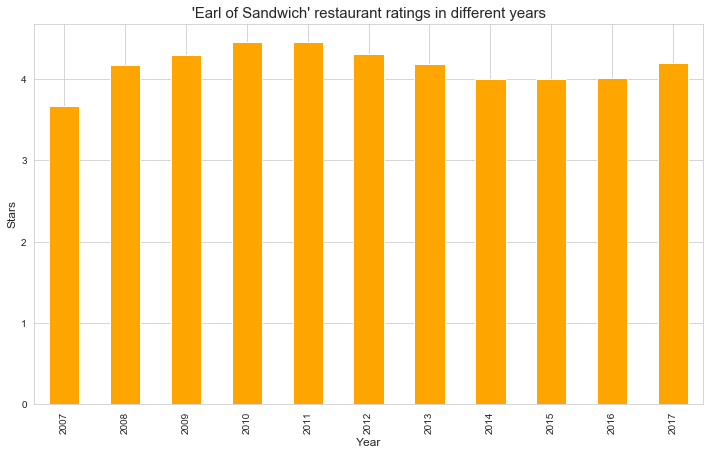

In [234]:
earl_r.date = pd.to_datetime(earl_r.date)
earl_r.groupby(earl_r.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7),color='orange')
plt.title("'Earl of Sandwich' restaurant ratings in different years", fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stars', fontsize=12)
plt.show()

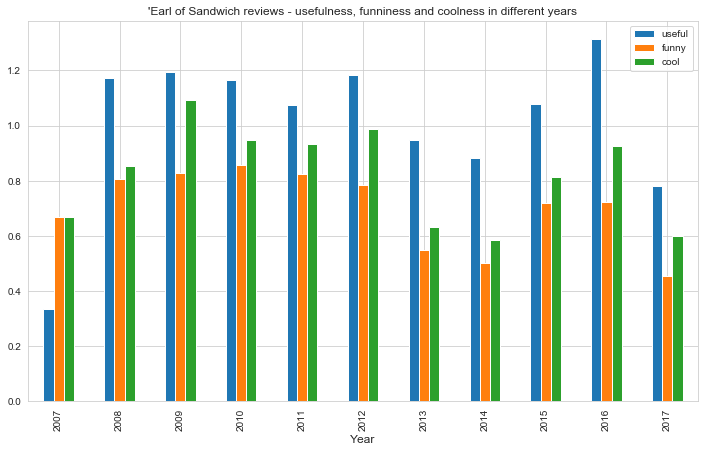

In [235]:
earl_r.date = pd.to_datetime(earl_r.date)
earl_r.groupby(earl_r.date.dt.year)[['useful','funny','cool']].mean().plot(kind='bar', figsize=(12, 7))
plt.title("'Earl of Sandwich reviews - usefulness, funniness and coolness in different years", fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

### Papa John's Pizza is rated 1 star and has many negative reviews. So, lets see what are the major complaints people have with the help of a wordCloud

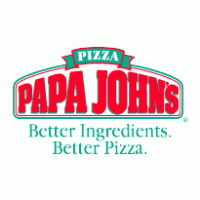

In [236]:
hue = yb.loc[yb['name'] == '"Papa John\'s Pizza"']
hue_r = yr.loc[yr['business_id'].isin(hue.business_id)]
hue_r['text_clear'] = hue_r['text'].apply(preprocess)

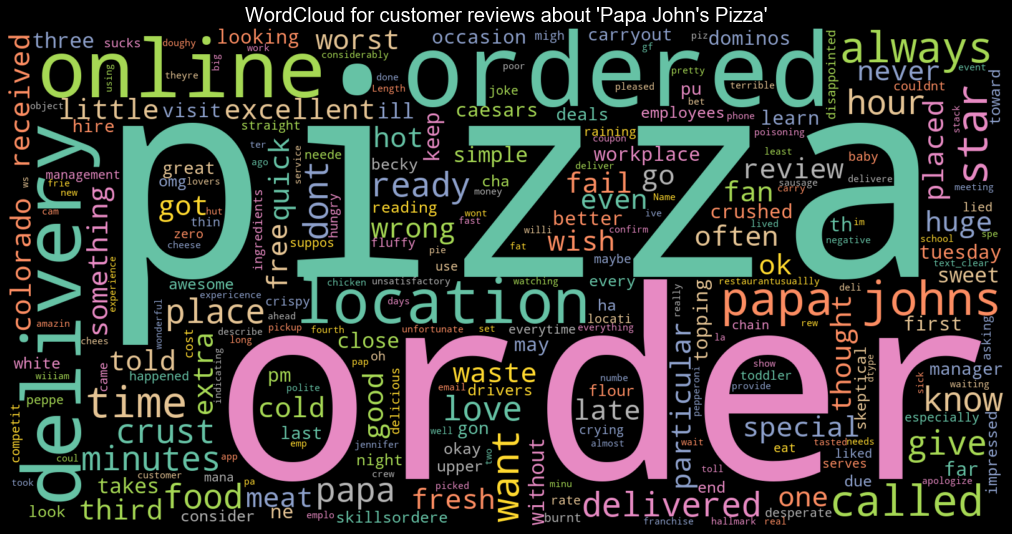

In [237]:
from wordcloud import WordCloud
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000,colormap='Set2')
wc.generate(str(hue_r['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("WordCloud for customer reviews about 'Papa John's Pizza'", fontsize=20,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

> We can see that most reviewers complain about the delivery time being too long, the food being cold, bad taste, and so on. So that is something Papa John's should focus on, or gradually their business could fail and close down